<a href="https://colab.research.google.com/github/pgpanagiotidis/Africa-Economic-Banking-and-Systemic-Crisis/blob/main/Africa_Economic_Banking_Systemic_Crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Generic imports we will need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D    
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [5]:
df = pd.read_csv ('african_crises.csv')

In [6]:
print(df.columns)

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')


In [7]:
#convert categorical variables to numeric
df['banking_crisis']=df['banking_crisis'].replace(['crisis','no_crisis'],[1,0])

In [8]:
# make time series the dataset
df = df.set_index('year')

Feature: 0, Score: 0.61230
Feature: 1, Score: 0.13983
Feature: 2, Score: 0.02051
Feature: 3, Score: 0.01724
Feature: 4, Score: 0.00379
Feature: 5, Score: 0.16511
Feature: 6, Score: 0.00575
Feature: 7, Score: 0.01429
Feature: 8, Score: 0.02117


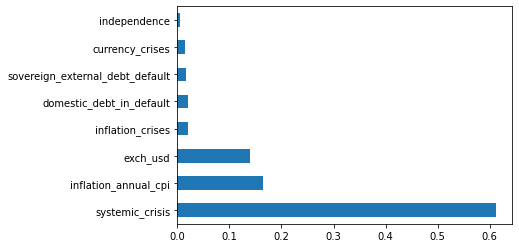

In [9]:
# random forest for feature importance for banking crisis feature
# define dataset
dfnew=df[['systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis']]
X, y = dfnew[['systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises']],dfnew['banking_crisis']
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(8)
   .plot(kind='barh'))
#systemic_crisis, inflation_annual_cpi and exch_usd are the most crucial feature for the prediction of the banking crisis

In [32]:
#Inflation annual CPI, the exchange rate of the country vis-a-vis the USD, the systemic crisis and the bank crisis for every country
def Countryplot(data):
  for i in data['country'].unique():
    dfcountry=data[data['country']==i]
    fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(16,1))
    dfcountry['inflation_annual_cpi'].plot(ax=axes[0])
    axes[0].title.set_text('Inflation annual CPI')
    dfcountry['exch_usd'].plot(ax=axes[1])
    axes[1].title.set_text('The exchange rate vis-a-vis the USD')
    dfcountry['systemic_crisis'].plot(ax=axes[2])
    axes[2].title.set_text('Systemic crisis')
    dfcountry['banking_crisis'].plot(ax=axes[3])
    axes[3].title.set_text('Banking crisis')
    plt.figtext(0.5, 1.3, i, ha='center', va='center')
    plt.show()

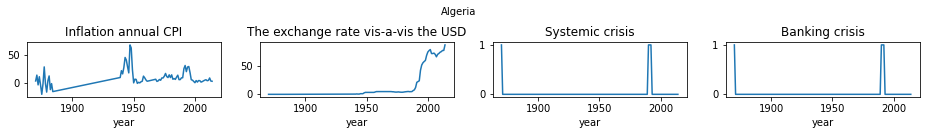

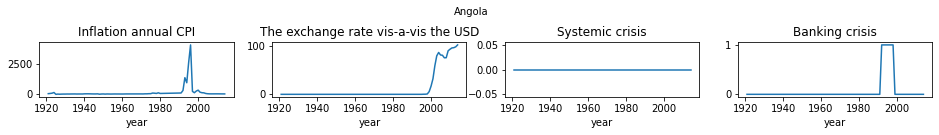

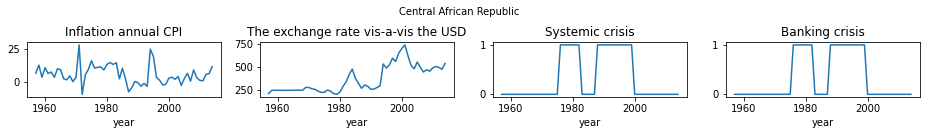

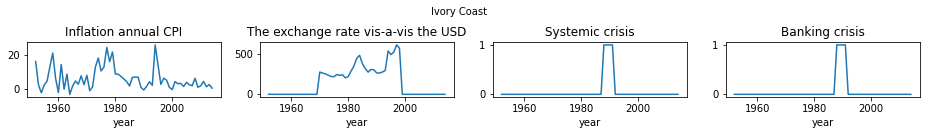

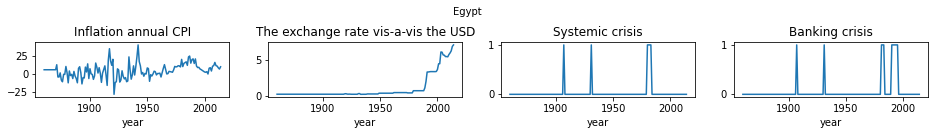

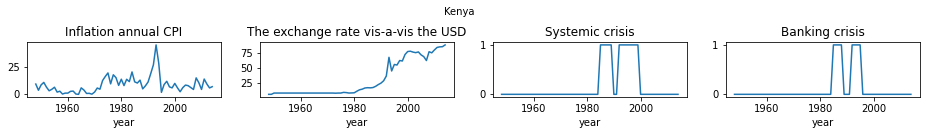

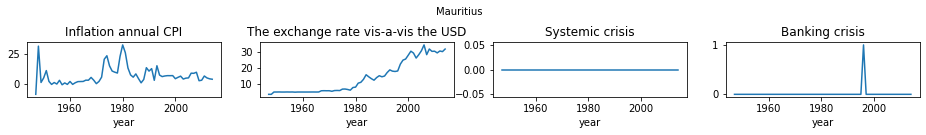

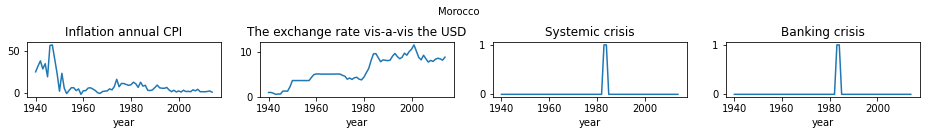

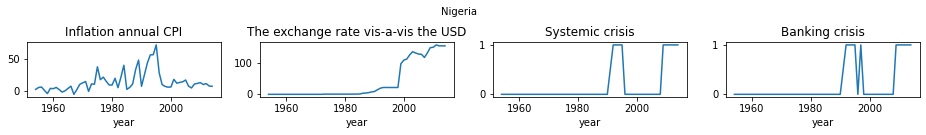

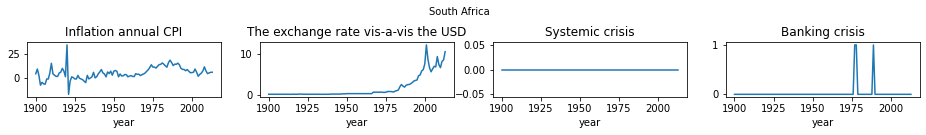

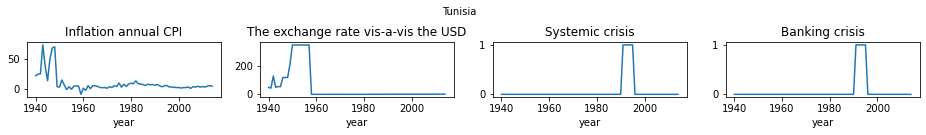

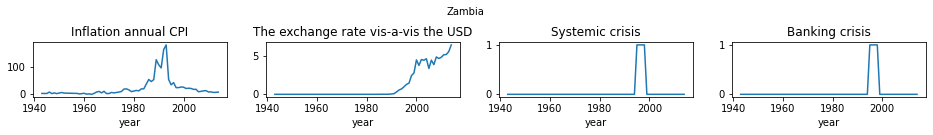

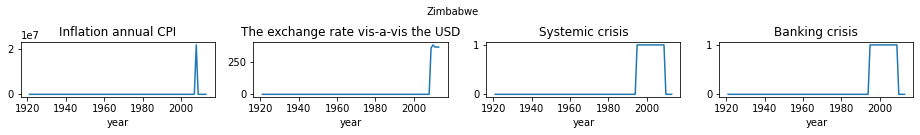

In [33]:
#Inflation annual CPI, the exchange rate of the country vis-a-vis the USD, the systemic crisis and the bank crisis for every country
Countryplot(df)

In [34]:
#Inflation annual CPI and The exchange rate of the country vis-a-vis the USD all in one plot for every country
def Countryplotall(data):
  for i in data['country'].unique():
    dfcountry=data[data['country']==i]
    plt.plot(dfcountry['inflation_annual_cpi'])
    plt.plot(dfcountry['exch_usd'])
    plt.legend(['Inflation annual CPI', 'The exchange rate vis-a-vis the USD'])
    plt.xlabel('Year')
    plt.title(i)
    plt.show()
    


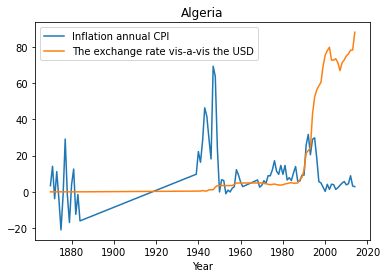

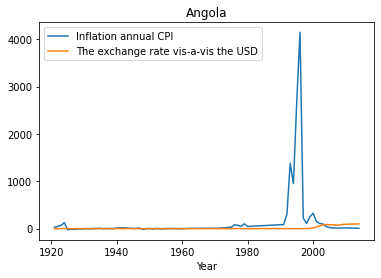

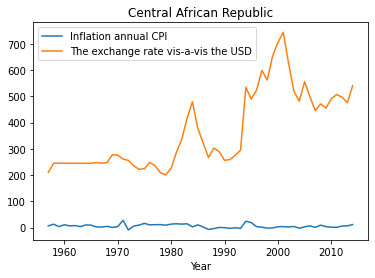

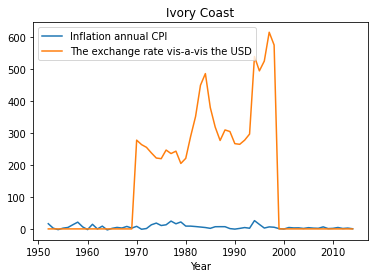

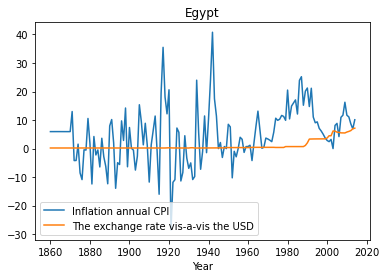

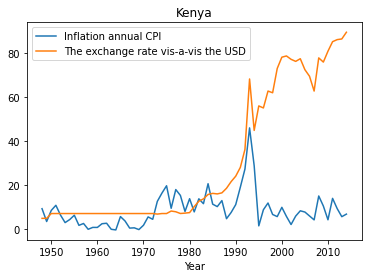

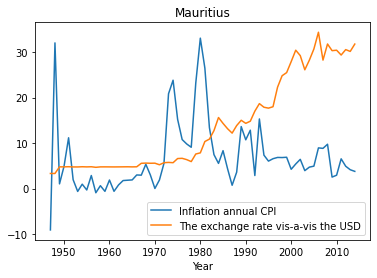

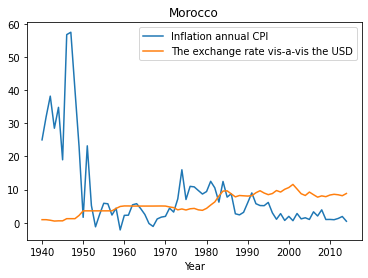

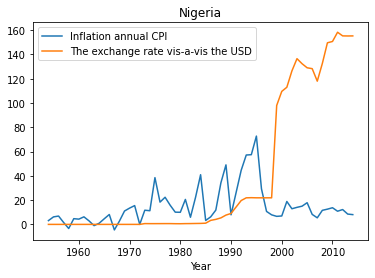

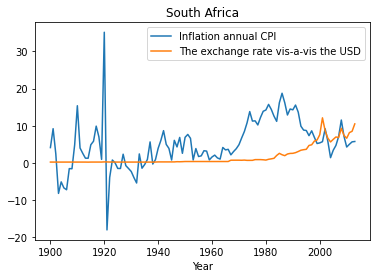

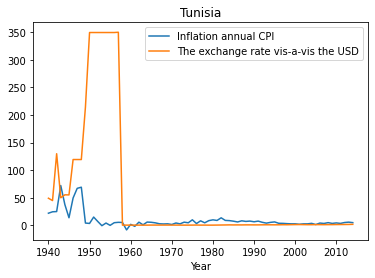

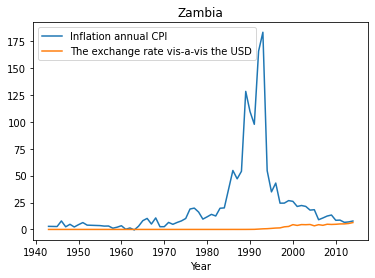

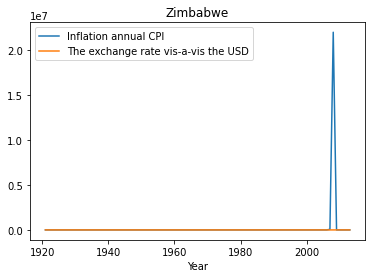

In [35]:
#Inflation annual CPI and The exchange rate vis-a-vis the USD all in one plot for every country
Countryplotall(df)